<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/07_02_MIMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how to use functions from `tbcontrol`, `numpy` and `matplotlib` to solve Multiple-Input Multiple-Output control problems.

In [3]:
!pip install tbcontrol
from tbcontrol import blocksim 
import numpy # as we usual need some numerical gadgets
import matplotlib.pyplot as plt # in order to produce nice plots
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## [Example 10.6](https://ia802909.us.archive.org/32/items/process-control-a-first-course-with-matlab/Process%20Control%20A%20First%20Course%20with%20MATLAB.pdf#page=236) (Pao C. Chau, Process Control: A First Course with MATLAB)

In this model, $x_D$ and $x_B$ are the distillate and the bottom compositions, respectively; $L$ is the reflux flow rate, and $V$ is the boil-up rate.

![](https://www.researchgate.net/profile/Horst-Schulte/publication/268386449/figure/fig9/AS:563405431611393@1511337730120/Distillation-column-LV-configuration-87.png)

In [41]:
# Example 10.6
def example_106_ol(ts, K=[[0.07,-0.05],[0.1,-0.15]], tau=[[12,15],[11,10]], td=[[3,1],[4,2]], L=1, V=0):
  # Creating the blocks for the example 10.6
  G11 = blocksim.LTI('G11', 'L', 'Y11', K[0][0], [tau[0][0], 1])
  D11 = blocksim.Deadtime('D11', 'Y11', 'Y11d', td[0][0])
  G12 = blocksim.LTI('G12', 'V', 'Y12', K[0][1], [tau[0][1], 1])
  D12 = blocksim.Deadtime('D12', 'Y12', 'Y12d', td[0][1])
  G21 = blocksim.LTI('G21', 'L', 'Y21', K[1][0], [tau[1][0], 1])
  D21 = blocksim.Deadtime('D21', 'Y21', 'Y21d', td[1][0])
  G22 = blocksim.LTI('G22', 'V', 'Y22', K[1][1], [tau[1][1], 1])
  D22 = blocksim.Deadtime('D22', 'Y22', 'Y22d', td[1][1])

  # Creating the diagram for the example 10.6
  diagram = blocksim.Diagram([G11, D11, G12, D12, G21, D21, G22, D22], 
                               sums={'XD': ('+Y11d', '+Y12d'), 
                                     'XB': ('+Y21d', '+Y22d')}, 
                               inputs={'L': blocksim.step(starttime=20,size=L), 
                                       'V' : blocksim.step(starttime=20,size=V)})
  simulation_results = diagram.simulate(ts, progress=True)
  return simulation_results['L'], simulation_results['V'], simulation_results['XD'], simulation_results['XB']

In [42]:
ts = numpy.linspace(start=0, stop=100, num=100*100)
L, _, XD, XB = example_106_ol(ts)

  0%|          | 0/10000 [00:00<?, ?it/s]

[Text(0, 0.5, '$V$'), Text(0.5, 0, 'Time')]

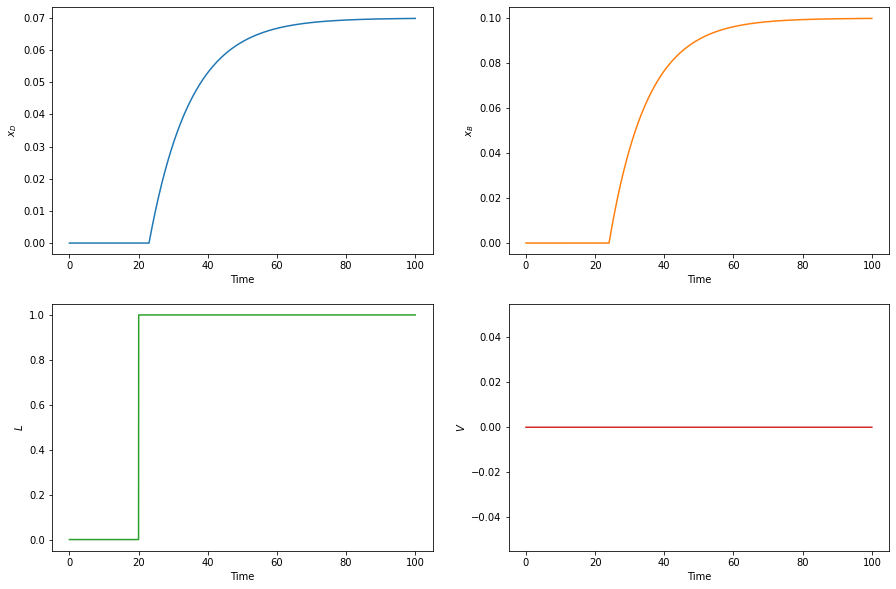

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(ts, XD)
axs[0, 0].set(xlabel='Time', ylabel='$x_D$')
axs[0, 1].plot(ts, XB, 'tab:orange')
axs[0, 1].set(xlabel='Time', ylabel='$x_B$')
axs[1, 0].plot(ts, L, 'tab:green')
axs[1, 0].set(xlabel='Time', ylabel='$L$')
axs[1, 1].plot(ts, 0*ts, 'tab:red')
axs[1, 1].set(xlabel='Time', ylabel='$V$')

In [33]:
_, V, XD, XB = example_106_ol(ts, L=0, V=1)

  0%|          | 0/10000 [00:00<?, ?it/s]

[Text(0, 0.5, 'V'), Text(0.5, 0, 'Time')]

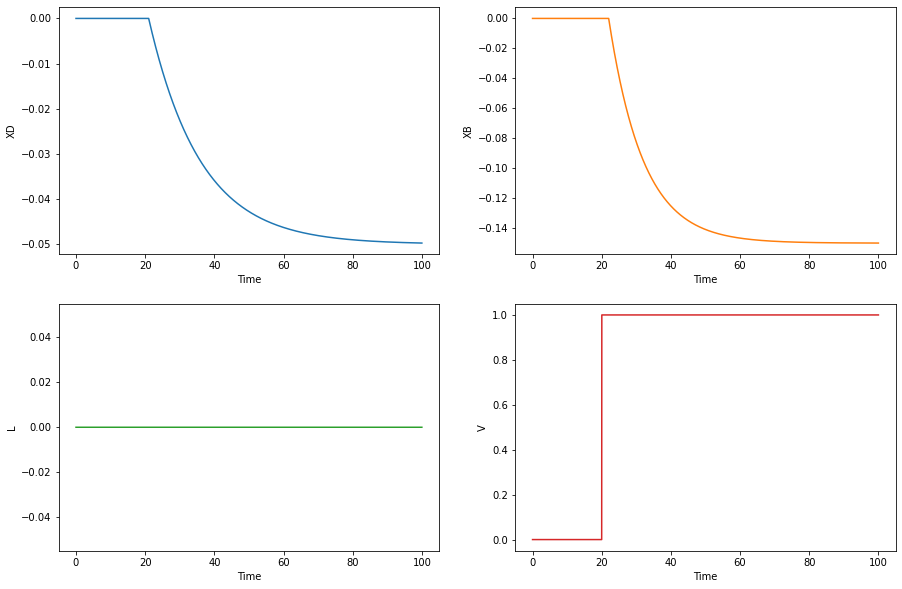

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(ts, XD)
axs[0, 0].set(xlabel='Time', ylabel='$x_D$')
axs[0, 1].plot(ts, XB, 'tab:orange')
axs[0, 1].set(xlabel='Time', ylabel='$x_B$')
axs[1, 0].plot(ts, 0*ts, 'tab:green')
axs[1, 0].set(xlabel='Time', ylabel='$L$')
axs[1, 1].plot(ts, V, 'tab:red')
axs[1, 1].set(xlabel='Time', ylabel='$V$')